In [ ]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import networkx as nx
import numpy as np
from networkx.algorithms import tree
import math
import time

def max_2d_matrix(distance_matrix):
    result = np.where(distance_matrix == np.amax(distance_matrix))
    listOfCordinates = list(zip(result[0], result[1]))
    return listOfCordinates

# deletion algorithm
# input G just have node and attribute without edges
def deletion(G,n):
     cost = 0
     mark = 0
     remove_start = 0
     remove_end = 0
     pos = nx.get_node_attributes(G,'pos')
     distance_matrix=np.zeros(shape=(n,n))
     temp_matrix=np.zeros(shape=(n,n))
     node_degree = G.degree()
     temp_distance = 0
     degree_min = min(span for n,span in node_degree)
     for i in range(n):
       for j in range(n):
         if i != j:
           G.add_edge(i,j)
           start_coordinate = pos.get(i)
           end_coordinate = pos.get(j)
           edistance = get_euclidean_distance(start_coordinate,end_coordinate)
           distance_matrix[i][j]=edistance
     temp_2_matrix = distance_matrix.copy()
     while(temp_2_matrix.max() != 0):
         if (nx.is_connected(G)) and (degree_min >= 3) and (nx.diameter(G) < 4):
            listOfCordinates = max_2d_matrix(temp_2_matrix)
            # for cor in listOfCordinates:
            #     print(cor)
            if(listOfCordinates[0][0]<=listOfCordinates[0][1]):
                remove_start=listOfCordinates[0][0]
                remove_end=listOfCordinates[0][1]
            else:
                remove_start = listOfCordinates[0][1]
                remove_end = listOfCordinates[0][0]
            G.remove_edge(remove_start,remove_end)
            temp_distance = distance_matrix[remove_start][remove_end]
            distance_matrix[remove_start][remove_end]= 0
            distance_matrix[remove_end][remove_start] = 0
            temp_2_matrix[remove_start][remove_end]= 0
            temp_2_matrix[remove_end][remove_start] = 0
            degree_min = min(span for n, span in node_degree)
         else:
            G.add_edge(remove_start,remove_end)
            distance_matrix[remove_start][remove_end] = temp_distance
            distance_matrix[remove_end][remove_start] = temp_distance
            temp_2_matrix[remove_start][remove_end] = 0
            temp_2_matrix[remove_end][remove_start] = 0
            degree_min = min(span for n, span in node_degree)
     cost = np.sum(distance_matrix)
     return cost,G

def get_euclidean_distance(source, dest):
    x1, y1 = source
    x2, y2 = dest

    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# generate network random with constrain
def generate_random_network(G):
    node_degree = G.degree()
    degree_min = min(span for n,span in node_degree)
    while (not G.is_connected) or (degree_min < 3) or (nx.diameter(G)>4):
        start =  choice(G.nodes())
        end = choice(G.nodes())
        while start == end:
            end = choice(G.nodes())
        G.add_edge(start,end)
    return G



del_time = []
graph_1 = []
cost_1 = []
for i in range(15,66,5):
   n=i
   G = nx.Graph()
   g = G.copy()
   zero_matrix = np.zeros(shape=(n,n))
   for i in range(n):
     s=0
     e=0
     while (zero_matrix[s][e] != 0):
         allowed_values = list(range(0, n))
         s=random.choice(allowed_values)
         allowed_values.remove(s)
         e=random.choice(allowed_values)
     G.add_node(i,pos=(s,e))
     zero_matrix[s][e]=i+1
     pos = nx.get_node_attributes(G, 'pos')
   D = G.copy()
   for i in range(n):
     for j in range(n):
       D.add_edge(i,j)

   start_del = time.time()
   del_cost,del_graph = deletion(D,n)
   end_del = time.time()
   del_time.append(end_del-start_del)
   graph_1.append(del_graph)
   cost_1.append(del_cost)

In [ ]:
cost_1

[155.89452431410052,
 254.9722820650723,
 520.7488356385009,
 506.0229298701896,
 814.6234228163732,
 1129.1058952072008,
 1483.5787715553836,
 1931.1093290413387,
 1991.126337498095,
 2617.921232669173,
 3557.390375017205]

In [ ]:
  # generate network random with constrain
def generate_random_network(G,n):
      node_degree = G.degree()
      degree_min = 0
      while (not nx.is_connected(G)) or (degree_min < 3) or (nx.diameter(G) > 4):
          start = random.randint(0,n-1)
          end = random.randint(0,n-1)
          while start == end:
              end = random.randint(0,n-1)
          G.add_edge(start, end)
          degree_min = min(span for n, span in node_degree)
      return G

def get_network_list(n,G,population_size):
   A=[]
   for i in range(population_size):
     A.append(generate_random_network(G,n))
   print(A)
   return A
#first generation random n network confirm to the constraint
# first_generation_list = get_network_list(n,G,10)

def get_euclidean_distance(source, dest):
   x1, y1 = source
   x2, y2 = dest

   return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# function to check constraint
def check_network_valid(G):
   node_degree = G.degree()
   degree_min = min(span for n, span in node_degree)
   while (nx.is_connected(G)) and (degree_min >= 3) and (nx.diameter(G) <= 4):
           return True
   else:
       return False

def choosen(population,cost):
    k=5
   #initial selection
    selection_index = random.randint(0,len(population)-1)
    index_list = []
    for i in range(round(len(population)/k)):
        index_list.append(random.randrange(0,len(population),5))
    for index in index_list:
      #get the best cost
        if cost[index] < cost[selection_index]:
          selection_index = index
   #return a graph
    return population[selection_index]


def crossover(father, mother, cross_rate):
    child_one, child_two = father.copy(), mother.copy()
    # recombination and check valid
    # recombination
    temp = 0
    if random.random() < cross_rate:
        # pdo not choose last index in the list as cross point
        cross_point = random.randint(1, father.number_of_nodes() - 2)
        for i in range(cross_point):
            for j in range(cross_point):
                if i != j:
                    if father.has_edge(i,j):
                        child_one.add_edge(i,j)
                    else:
                        child_one.remove_edge(i,j)

                    if mother.has_edge(i,j):
                        child_two.add_edge(i,j)
                    else:
                        child_two.remove_edge(i,j)

        for i in range(father.number_of_nodes()-cross_point):
            for j in range(father.number_of_nodes()-cross_point):
                if i != j:
                    if father.has_edge(i, j):
                        child_one.add_edge(i, j)
                    else:
                        child_one.remove_edge(i, j)

                    if mother.has_edge(i, j):
                        child_two.add_edge(i, j)
                    else:
                        child_two.remove_edge(i, j)

        # cross over the graph
        # child_one = father[:cross_point] + mother[cross_point:]
        # child_two = mother[:cross_point] + father[cross_point:]
        temp = temp + 1
    while (not check_network_valid(child_one) or not check_network_valid(child_two)):
        if temp > father.number_of_nodes():
            return father, mother
        # recombination
        if random.random() < cross_rate:
            # pdo not choose last index in the list as cross point
            cross_point = cross_point + 1
            if cross_point > father.number_of_nodes():
                cross_point = (cross_point) % (father.number_of_nodes())
            temp = temp + 1
            # cross over
            # child_one = father[:cross_point] + mother[cross_point:]
            # child_two = mother[:cross_point] + father[cross_point:]
            for i in range(cross_point):
                for j in range(cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

            for i in range(father.number_of_nodes() - cross_point):
                for j in range(father.number_of_nodes() - cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

    return child_one, child_two

def calculate_cost(G,n):
    distance_matrix=np.zeros(shape=(n,n))
    pos = nx.get_node_attributes(G, 'pos')
    for i in range(n):
       for j in range(n):
         if i != j:
           G.add_edge(i,j)
           start_coordinate = pos.get(i)
           end_coordinate = pos.get(j)
           edistance = get_euclidean_distance(start_coordinate,end_coordinate)
           distance_matrix[i][j]=edistance
    return np.sum(distance_matrix)

def mutation(child_graph,mutation_rate):
   for i in range(child_graph.number_of_nodes()):
     for j in range(child_graph.number_of_nodes()):
       if i != j:
         if random.random() < mutation_rate:
          #flip
           if child_graph.has_edge(i,j):
             child_graph.remove_edge(i,j)
            # child_graph.remove_edge(j.i)
           else:
             child_graph.add_edge(i,j)
            # child_graph.add_edge(j,i)



#genetic algorithm
def genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate):
  # initial population
   population = []
   population = get_network_list(network_nodes_size,G,population_size)
   # track minimal cost network
   min_network,min_network_cost = 0,calculate_cost(population[0],network_nodes_size)
   # iterate times
   for j in range(iterator_size):
     # get the first generation list cost list
     cost = [calculate_cost(k,n) for k in population]
     # get the min of current time
     for i in range(population_size):
        if cost[i] < min_network_cost:
          min_network,min_network_cost = population[i],cost[i]
     # generate next gen step
     #select parents that we need
     choosen_parents = [choosen(population,cost) for m in range(population_size)]
     #next generation list
     children = []
     #each two near element in population list to make parents pair
     for p in range(0,population_size,2):
       parent_father, parent_mother = choosen_parents[p], choosen_parents[p+1]
       #crossover step
       for child in crossover(parent_father,parent_mother,cross_rate):
          #mutation step
          mutation(child,mutation_rate)
          #store in next generation
          children.append(child)
     population = children
   return min_network,min_network_cost


#first part
iterator_size = 20
population_size = 10
cross_rate = 0.5
mutation_rate = 1/n
network_nodes_size = n
for k in range(15,66,5):  
   n=k
   mutation_rate = 1/n
   network_nodes_size = n
   for i in range(n):
      s=0
      e=0
      while (zero_matrix[s][e] != 0):
          allowed_values = list(range(0,n))
          s=random.choice(allowed_values)
          allowed_values.remove(s)
          e=random.choice(allowed_values)
      G.add_node(j,pos=(s,e))
      zero_matrix[s][e]=i+1
   G = nx.Graph()
   g = G.copy()
   T_1=nx.minimum_spanning_tree(G,algorithm='kruskal')
   T_2=nx.minimum_spanning_tree(G,algorithm='prim')
   zero_matrix = np.zeros(shape=(n,n))

   min_network,min_network_cost=genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate)
   print(min_network_cost)


In [ ]:
  # generate network random with constrain
def generate_random_network(G,n):
      node_degree = G.degree()
      degree_min = 0
      while (not nx.is_connected(G)) or (degree_min < 3) or (nx.diameter(G) > 4):
          start = random.randint(0,n-1)
          end = random.randint(0,n-1)
          while start == end:
              end = random.randint(0,n-1)
          G.add_edge(start, end)
          degree_min = min(span for n, span in node_degree)
      return G

def get_network_list(n,G,population_size):
   A=[]
   for i in range(population_size):
     A.append(generate_random_network(G,n))
   print(A)
   return A
#first generation random n network confirm to the constraint
# first_generation_list = get_network_list(n,G,10)

def get_euclidean_distance(source, dest):
    x1, y1 = source
    x2, y2 = dest

    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# function to check constraint
def check_network_valid(G):
   node_degree = G.degree()
   degree_min = min(span for n, span in node_degree)
   while (nx.is_connected(G)) and (degree_min >= 3) and (nx.diameter(G) <= 4):
          return True
   else:
       return False

def choosen(population,cost):
    k=5
   #initial selection
    selection_index = random.randint(0,len(population)-1)
    index_list = []
    for i in range(round(len(population)/k)):
        index_list.append(random.randrange(0,len(population),5))
    for index in index_list:
      #get the best cost
        if cost[index] < cost[selection_index]:
          selection_index = index
   #return a graph
    return population[selection_index]


def crossover(father, mother, cross_rate):
    child_one, child_two = father.copy(), mother.copy()
    # recombination and check valid
    # recombination
    temp = 0
    if random.random() < cross_rate:
        # pdo not choose last index in the list as cross point
        cross_point = random.randint(1, father.number_of_nodes() - 2)
        for i in range(cross_point):
            for j in range(cross_point):
                if i != j:
                    if father.has_edge(i,j):
                        child_one.add_edge(i,j)
                    else:
                        child_one.remove_edge(i,j)

                    if mother.has_edge(i,j):
                        child_two.add_edge(i,j)
                    else:
                        child_two.remove_edge(i,j)

        for i in range(father.number_of_nodes()-cross_point):
            for j in range(father.number_of_nodes()-cross_point):
                if i != j:
                    if father.has_edge(i, j):
                        child_one.add_edge(i, j)
                    else:
                        child_one.remove_edge(i, j)

                    if mother.has_edge(i, j):
                        child_two.add_edge(i, j)
                    else:
                        child_two.remove_edge(i, j)

        # cross over the graph
        # child_one = father[:cross_point] + mother[cross_point:]
        # child_two = mother[:cross_point] + father[cross_point:]
        temp = temp + 1
    while (not check_network_valid(child_one) or not check_network_valid(child_two)):
        if temp > father.number_of_nodes():
            return father, mother
        # recombination
        if random.random() < cross_rate:
            # pdo not choose last index in the list as cross point
            cross_point = cross_point + 1
            if cross_point > father.number_of_nodes():
                cross_point = (cross_point) % (father.number_of_nodes())
            temp = temp + 1
            # cross over
            # child_one = father[:cross_point] + mother[cross_point:]
            # child_two = mother[:cross_point] + father[cross_point:]
            for i in range(cross_point):
                for j in range(cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

            for i in range(father.number_of_nodes() - cross_point):
                for j in range(father.number_of_nodes() - cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

    return child_one, child_two

def calculate_cost(G,n):
    distance_matrix=np.zeros(shape=(n,n))
    pos = nx.get_node_attributes(G, 'pos')
    for i in range(n):
       for j in range(n):
         if i != j:
           G.add_edge(i,j)
           start_coordinate = pos.get(i)
           end_coordinate = pos.get(j)
           edistance = get_euclidean_distance(start_coordinate,end_coordinate)
           distance_matrix[i][j]=edistance
    return np.sum(distance_matrix)

def mutation(child_graph,mutation_rate):
   for i in range(child_graph.number_of_nodes()):
    for j in range(child_graph.number_of_nodes()):
      if i != j:
        if random.random() < mutation_rate:
          #flip
          if child_graph.has_edge(i,j):
            child_graph.remove_edge(i,j)
            # child_graph.remove_edge(j.i)
          else:
            child_graph.add_edge(i,j)
            # child_graph.add_edge(j,i)



#genetic algorithm
def genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate):
   # initial population
   population = []
   population = get_network_list(network_nodes_size,G,population_size)
   # track minimal cost network
   min_network,min_network_cost = 0,calculate_cost(population[0],network_nodes_size)
   # iterate times
   for j in range(iterator_size):
     # get the first generation list cost list
     cost = [calculate_cost(k,n) for k in population]
     # get the min of current time
     for i in range(population_size):
        if cost[i] < min_network_cost:
          min_network,min_network_cost = population[i],cost[i]
     # generate next gen step
     #select parents that we need
     choosen_parents = [choosen(population,cost) for m in range(population_size)]
     #next generation list
     children = []
     #each two near element in population list to make parents pair
     for p in range(0,population_size,2):
       parent_father, parent_mother = choosen_parents[p], choosen_parents[p+1]
       #crossover step
       for child in crossover(parent_father,parent_mother,cross_rate):
          #mutation step
          mutation(child,mutation_rate)
          #store in next generation
          children.append(child)
     population = children
   return min_network,min_network_cost


#first part
n=27
G = nx.Graph()
g = G.copy()
T_1=nx.minimum_spanning_tree(G,algorithm='kruskal')
T_2=nx.minimum_spanning_tree(G,algorithm='prim')
zero_matrix = np.zeros(shape=(n,n))

for i in range(n):
   s=0
   e=0
   while (zero_matrix[s][e] != 0):
       allowed_values = list(range(0,n))
       s=random.choice(allowed_values)
       allowed_values.remove(s)
       e=random.choice(allowed_values)
   G.add_node(i,pos=(s,e))
   zero_matrix[s][e]=i+1
 # initial set for genetic algorithm

iterator_size = 20
population_size = 10
cross_rate = 0.5
mutation_rate = 1/n
network_nodes_size = n
min_network,min_network_cost=genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate)


[<networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>, <networkx.classes.graph.Graph object at 0x7f9587460950>]
10186.224141443301


In [ ]:
print(min_network)

0


In [ ]:
x1 = np.arange(15,66,5)
y1 = np.array(density)
plt.plot(x1,y1,color="red")
plt.show()
x2 = np.arange(15,66,5)
y2 = np.array(total_cost)
plt.plot(x2,y2,color="blue")
plt.show()

In [ ]:
from re import A
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import networkx as nx
import numpy as np
from networkx.algorithms import tree
import math

  # generate network random with constrain
def generate_random_network(G,n):
      node_degree = G.degree()
      degree_min = 0
      while (not nx.is_connected(G)) or (degree_min < 3) or (nx.diameter(G) > 4):
          start = random.randint(0,n-1)
          end = random.randint(0,n-1)
          while start == end:
              end = random.randint(0,n-1)
          G.add_edge(start, end)
          degree_min = min(span for n, span in node_degree)
      return G

def get_network_list(n,G,population_size):
   A=[]
   for i in range(population_size):
     A.append(generate_random_network(G,n))
   print(A)
   return A
#first generation random n network confirm to the constraint
# first_generation_list = get_network_list(n,G,10)

def get_euclidean_distance(source, dest):
    x1, y1 = source
    x2, y2 = dest

    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# function to check constraint
def check_network_valid(G):
  node_degree = G.degree()
  degree_min = min(span for n, span in node_degree)
  while (nx.is_connected(G)) and (degree_min >= 3) and (nx.diameter(G) <= 4):
          return True
  else:
      return False

def choosen(population,cost):
    k=5
   #initial selection
    selection_index = random.randint(0,len(population)-1)
    index_list = []
    for i in range(round(len(population)/k)):
        index_list.append(random.randrange(0,len(population),5))
    for index in index_list:
      #get the best cost
        if cost[index] < cost[selection_index]:
          selection_index = index
   #return a graph
    return population[selection_index]


def crossover(father, mother, cross_rate):
    child_one, child_two = father.copy(), mother.copy()
    # recombination and check valid
    # recombination
    temp = 0
    if random.random() < cross_rate:
        # pdo not choose last index in the list as cross point
        cross_point = random.randint(1, father.number_of_nodes() - 2)
        for i in range(cross_point):
            for j in range(cross_point):
                if i != j:
                    if father.has_edge(i,j):
                        child_one.add_edge(i,j)
                    else:
                        child_one.remove_edge(i,j)

                    if mother.has_edge(i,j):
                        child_two.add_edge(i,j)
                    else:
                        child_two.remove_edge(i,j)

        for i in range(father.number_of_nodes()-cross_point):
            for j in range(father.number_of_nodes()-cross_point):
                if i != j:
                    if father.has_edge(i, j):
                        child_one.add_edge(i, j)
                    else:
                        child_one.remove_edge(i, j)

                    if mother.has_edge(i, j):
                        child_two.add_edge(i, j)
                    else:
                        child_two.remove_edge(i, j)

        # cross over the graph
        # child_one = father[:cross_point] + mother[cross_point:]
        # child_two = mother[:cross_point] + father[cross_point:]
        temp = temp + 1
    while (not check_network_valid(child_one) or not check_network_valid(child_two)):
        if temp > father.number_of_nodes():
            return father, mother
        # recombination
        if random.random() < cross_rate:
            # pdo not choose last index in the list as cross point
            cross_point = cross_point + 1
            if cross_point > father.number_of_nodes():
                cross_point = (cross_point) % (father.number_of_nodes())
            temp = temp + 1
            # cross over
            # child_one = father[:cross_point] + mother[cross_point:]
            # child_two = mother[:cross_point] + father[cross_point:]
            for i in range(cross_point):
                for j in range(cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

            for i in range(father.number_of_nodes() - cross_point):
                for j in range(father.number_of_nodes() - cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

    return child_one, child_two

def calculate_cost(G,n):
    distance_matrix=np.zeros(shape=(n,n))
    pos = nx.get_node_attributes(G, 'pos')
    for i in range(n):
       for j in range(n):
         if i != j:
           G.add_edge(i,j)
           start_coordinate = pos.get(i)
           end_coordinate = pos.get(j)
           edistance = get_euclidean_distance(start_coordinate,end_coordinate)
           distance_matrix[i][j]=edistance
    return np.sum(distance_matrix)

def mutation(child_graph,mutation_rate):
  for i in range(child_graph.number_of_nodes()):
    for j in range(child_graph.number_of_nodes()):
      if i != j:
        if random.random() < mutation_rate:
          #flip
          if child_graph.has_edge(i,j):
            child_graph.remove_edge(i,j)
            # child_graph.remove_edge(j.i)
          else:
            child_graph.add_edge(i,j)
            # child_graph.add_edge(j,i)



#genetic algorithm
def genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate):
  # initial population
  test = 0
  population = []
  population = get_network_list(network_nodes_size,G,population_size)
  # track minimal cost network
  min_network,min_network_cost =population[0].copy(),calculate_cost(population[0],network_nodes_size)
  # iterate times
  for j in range(iterator_size):
    # get the first generation list cost list
    cost = [calculate_cost(k,n) for k in population]
    # get the min of current time
    for i in range(population_size):
       if cost[i] < min_network_cost:
          # min_network = population[i]
          min_network = population[i]
          min_network_cost =cost[i]
    # generate next gen step
    #select parents that we need
    choosen_parents = [choosen(population,cost) for m in range(population_size)]
    #next generation list
    children = []
    #each two near element in population list to make parents pair
    for p in range(0,population_size,2):
      parent_father, parent_mother = choosen_parents[p], choosen_parents[p+1]
      #crossover step
      for child in crossover(parent_father,parent_mother,cross_rate):
         #mutation step
         mutation(child,mutation_rate)
         #store in next generation
         children.append(child)
    population = children
  return min_network,min_network_cost


#first part
n=27
G = nx.Graph()
g = G.copy()
T_1=nx.minimum_spanning_tree(G,algorithm='kruskal')
T_2=nx.minimum_spanning_tree(G,algorithm='prim')
zero_matrix = np.zeros(shape=(n,n))

for i in range(n):
  s=0
  e=0
  while (zero_matrix[s][e] != 0):
      allowed_values = list(range(0,n))
      s=random.choice(allowed_values)
      allowed_values.remove(s)
      e=random.choice(allowed_values)
  G.add_node(i,pos=(s,e))
  zero_matrix[s][e]=i+1
# initial set for genetic algorithm

iterator_size = 20
population_size = 10
cross_rate = 0.5
mutation_rate = 1/n
network_nodes_size = n
min_network,min_network_cost=genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate)
print(min_network_cost)



[<networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>, <networkx.classes.graph.Graph object at 0x7f9584471950>]
9536.683781912765


In [5]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import networkx as nx
import numpy as np
from networkx.algorithms import tree
import math
import time

def max_2d_matrix(distance_matrix):
    result = np.where(distance_matrix == np.amax(distance_matrix))
    listOfCordinates = list(zip(result[0], result[1]))
    return listOfCordinates

# deletion algorithm
# input G just have node and attribute without edges
def deletion(G,n):
     cost = 0
     mark = 0
     remove_start = 0
     remove_end = 0
     pos = nx.get_node_attributes(G,'pos')
     distance_matrix=np.zeros(shape=(n,n))
     temp_matrix=np.zeros(shape=(n,n))
     node_degree = G.degree()
     temp_distance = 0
     degree_min = min(span for n,span in node_degree)
     for i in range(n):
       for j in range(n):
         if i != j:
           G.add_edge(i,j)
           start_coordinate = pos.get(i)
           end_coordinate = pos.get(j)
           edistance = get_euclidean_distance(start_coordinate,end_coordinate)
           distance_matrix[i][j]=edistance
     temp_2_matrix = distance_matrix.copy()
     while(temp_2_matrix.max() != 0):
         if (nx.is_connected(G)) and (degree_min >= 3) and (nx.diameter(G) < 4):
            listOfCordinates = max_2d_matrix(temp_2_matrix)
            # for cor in listOfCordinates:
            #     print(cor)
            if(listOfCordinates[0][0]<=listOfCordinates[0][1]):
                remove_start=listOfCordinates[0][0]
                remove_end=listOfCordinates[0][1]
            else:
                remove_start = listOfCordinates[0][1]
                remove_end = listOfCordinates[0][0]
            G.remove_edge(remove_start,remove_end)
            temp_distance = distance_matrix[remove_start][remove_end]
            distance_matrix[remove_start][remove_end]= 0
            distance_matrix[remove_end][remove_start] = 0
            temp_2_matrix[remove_start][remove_end]= 0
            temp_2_matrix[remove_end][remove_start] = 0
            degree_min = min(span for n, span in node_degree)
         else:
            G.add_edge(remove_start,remove_end)
            distance_matrix[remove_start][remove_end] = temp_distance
            distance_matrix[remove_end][remove_start] = temp_distance
            temp_2_matrix[remove_start][remove_end] = 0
            temp_2_matrix[remove_end][remove_start] = 0
            degree_min = min(span for n, span in node_degree)
     cost = np.sum(distance_matrix)
     return cost,G

def get_euclidean_distance(source, dest):
    x1, y1 = source
    x2, y2 = dest

    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# generate network random with constrain
def generate_random_network(G):
    node_degree = G.degree()
    degree_min = min(span for n,span in node_degree)
    while (not G.is_connected) or (degree_min < 3) or (nx.diameter(G)>4):
        start =  choice(G.nodes())
        end = choice(G.nodes())
        while start == end:
            end = choice(G.nodes())
        G.add_edge(start,end)
    return G



del_time = []
graph_1 = []
cost_1 = []
for i in range(15,66,5):
   n=i
   G = nx.Graph()
   g = G.copy()
   zero_matrix = np.zeros(shape=(n,n))
   for i in range(n):
     s=0
     e=0
     while (zero_matrix[s][e] != 0):
         allowed_values = list(range(0, n))
         s=random.choice(allowed_values)
         allowed_values.remove(s)
         e=random.choice(allowed_values)
     G.add_node(i,pos=(s,e))
     zero_matrix[s][e]=i+1
     pos = nx.get_node_attributes(G, 'pos')
   D = G.copy()
   for i in range(n):
     for j in range(n):
       if i != j:
         D.add_edge(i,j)

   start_del = time.time()
   del_cost,del_graph = deletion(D,n)
   end_del = time.time()
   del_time.append(end_del-start_del)
   graph_1.append(del_graph)
   cost_1.append(del_cost)

In [1]:
from re import A
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import networkx as nx
import numpy as np
from networkx.algorithms import tree
import math
import time
def generate_random_network(G, n):
    node_degree = G.degree()
    degree_min = 0
    while (not nx.is_connected(G)) or (degree_min < 3) or (nx.diameter(G) > 4):
        start = random.randint(0, n - 1)
        end = random.randint(0, n - 1)
        while start == end:
            end = random.randint(0, n - 1)
        G.add_edge(start, end)
        degree_min = min(span for n, span in node_degree)
    return G


def get_network_list(n, G, population_size):
    A = []
    for i in range(population_size):
        A.append(generate_random_network(G, n))
    print(A)
    return A


# first generation random n network confirm to the constraint
# first_generation_list = get_network_list(n,G,10)

def get_euclidean_distance(source, dest):
    if (dest is None) or (source is None):
        return 0
    x1, y1 = source
    x2, y2 = dest
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


# function to check constraint
def check_network_valid(G):
    node_degree = G.degree()
    degree_min = min(span for n, span in node_degree)
    while (nx.is_connected(G)) and (degree_min >= 3) and (nx.diameter(G) <= 4):
        return True
    else:
        return False


def choosen(population, cost):
    k = 5
    # initial selection
    selection_index = random.randint(0, len(population) - 1)
    index_list = []
    for i in range(round(len(population) / k)):
        index_list.append(random.randrange(0, len(population), 5))
    for index in index_list:
        # get the best cost
        if cost[index] < cost[selection_index]:
            selection_index = index
    # return a graph
    return population[selection_index]


def crossover(father, mother, cross_rate):
    child_one, child_two = father.copy(), mother.copy()
    # recombination and check valid
    # recombination
    temp = 0
    if random.random() < cross_rate:
        # pdo not choose last index in the list as cross point
        cross_point = random.randint(1, father.number_of_nodes() - 2)
        for i in range(cross_point):
            for j in range(cross_point):
                if i != j:
                    if father.has_edge(i, j):
                        child_one.add_edge(i, j)
                    else:
                        child_one.remove_edge(i, j)

                    if mother.has_edge(i, j):
                        child_two.add_edge(i, j)
                    else:
                        child_two.remove_edge(i, j)

        for i in range(father.number_of_nodes() - cross_point):
            for j in range(father.number_of_nodes() - cross_point):
                if i != j:
                    if father.has_edge(i, j):
                        child_one.add_edge(i, j)
                    else:
                        child_one.remove_edge(i, j)

                    if mother.has_edge(i, j):
                        child_two.add_edge(i, j)
                    else:
                        child_two.remove_edge(i, j)

        # cross over the graph
        # child_one = father[:cross_point] + mother[cross_point:]
        # child_two = mother[:cross_point] + father[cross_point:]
        temp = temp + 1
    while (not check_network_valid(child_one) or not check_network_valid(child_two)):
        if temp > father.number_of_nodes():
            return father, mother
        # recombination
        if random.random() < cross_rate:
            # pdo not choose last index in the list as cross point
            cross_point = cross_point + 1
            if cross_point > father.number_of_nodes():
                cross_point = (cross_point) % (father.number_of_nodes())
            temp = temp + 1
            # cross over
            # child_one = father[:cross_point] + mother[cross_point:]
            # child_two = mother[:cross_point] + father[cross_point:]
            for i in range(cross_point):
                for j in range(cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

            for i in range(father.number_of_nodes() - cross_point):
                for j in range(father.number_of_nodes() - cross_point):
                    if i != j:
                        if father.has_edge(i, j):
                            child_one.add_edge(i, j)
                        else:
                            child_one.remove_edge(i, j)

                        if mother.has_edge(i, j):
                            child_two.add_edge(i, j)
                        else:
                            child_two.remove_edge(i, j)

    return child_one, child_two


def calculate_cost(G, n):
    distance_matrix = np.zeros(shape=(n, n))
    pos = nx.get_node_attributes(G, 'pos')
    for i in range(n):
        for j in range(n):
            if i != j:
                G.add_edge(i, j)
                start_coordinate = pos.get(i)
                end_coordinate = pos.get(j)
                edistance = get_euclidean_distance(start_coordinate, end_coordinate)
                distance_matrix[i][j] = edistance
    return np.sum(distance_matrix)


def mutation(child_graph, mutation_rate):
    for i in range(child_graph.number_of_nodes()):
        for j in range(child_graph.number_of_nodes()):
            if i != j:
                if random.random() < mutation_rate:
                    # flip
                    if child_graph.has_edge(i, j):
                        child_graph.remove_edge(i, j)
                        # child_graph.remove_edge(j.i)
                else:
                    child_graph.add_edge(i, j)
                        # child_graph.add_edge(j,i)


# genetic algorithm
def genetic_algorithm(G, network_nodes_size, population_size, iterator_size, cross_rate, mutation_rate):
    # initial population
    population = []
    population = get_network_list(network_nodes_size, G, population_size).copy()
    # track minimal cost network
    min_network, min_network_cost = population[0].copy(), calculate_cost(population[0], network_nodes_size)
    # iterate times
    for j in range(iterator_size):
        # get the first generation list cost list
        cost = [calculate_cost(k, network_nodes_size) for k in population]
        # get the min of current time
        for i in range(population_size):
            if cost[i] < min_network_cost:
                min_network, min_network_cost = population[i].copy(), cost[i]
        # generate next gen step
        # select parents that we need
        choosen_parents = [choosen(population, cost) for m in range(population_size)]
        # next generation list
        children = []
        # each two near element in population list to make parents pair
        for p in range(0, population_size, 2):
            parent_father, parent_mother = choosen_parents[p], choosen_parents[p + 1]
            # crossover step
            for child in crossover(parent_father, parent_mother, cross_rate):
                # mutation step
                mutation(child, mutation_rate)
                # store in next generation
                children.append(child)
        population = children.copy()
    return min_network, min_network_cost

# first part

# G = nx.Graph()
# g = G.copy()
# T_1=nx.minimum_spanning_tree(G,algorithm='kruskal')
# T_2=nx.minimum_spanning_tree(G,algorithm='prim')
# zero_matrix = np.zeros(shape=(n,n))

# for i in range(n):
#   s=0
#   e=0
#   while (zero_matrix[s][e] != 0):
#       allowed_values = list(range(0,n))
#       s=random.choice(allowed_values)
#       allowed_values.remove(s)
#       e=random.choice(allowed_values)
#   G.add_node(i,pos=(s,e))
#   zero_matrix[s][e]=i+1
# # initial set for genetic algorithm
# iterator_size = 20
# population_size = 10
# cross_rate = 0.5
# mutation_rate = 1/n
# network_nodes_size = n
# start_del = time.time()
# min_network,min_network_cost=genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate)
# end_del = time.time()
# cost_time = end_del-start_del
# Ge = min_network
def run(n):
   G = nx.Graph()
   g = G.copy()
   T_1=nx.minimum_spanning_tree(G,algorithm='kruskal')
   T_2=nx.minimum_spanning_tree(G,algorithm='prim')
   zero_matrix = np.zeros(shape=(n,n))

   for i in range(n):
     s=0
     e=0
     while (zero_matrix[s][e] != 0):
         allowed_values = list(range(0,n))
         s=random.choice(allowed_values)
         allowed_values.remove(s)
         e=random.choice(allowed_values)
     G.add_node(i,pos=(s,e))
     zero_matrix[s][e]=i+1
# initial set for genetic algorithm
   iterator_size = 5
   population_size = 10
   cross_rate = 0.5
   #change mutation_rate
   mutation_rate = 0.7
   network_nodes_size = n
   start_del = time.time()
   min_network,min_network_cost=genetic_algorithm(G,network_nodes_size,population_size,iterator_size,cross_rate,mutation_rate)
   end_del = time.time()
   cost_time = end_del-start_del
   Ge = min_network
   return cost_time,min_network_cost,min_network

time_f=[]
cost_f=[]
graph_g = []
# for i in range(15,18,1):
#    a1,a2=run(i)
#    time_f.append(a1)
#    cost_f.append(a2)

for i in range(15,66,5):
   a1,a2,net_graph=run(i)
   time_f.append(a1)
   cost_f.append(a2)
   graph_g.append(net_graph)
# for i in range(3,20,2):
#     a1,a2,net_graph=run(i)
#     time_f.append(a1)
#     cost_f.append(a2)
#     graph_g.append(net_graph)
                   
print(time_f)
print(cost_f)

[<networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>, <networkx.classes.graph.Graph object at 0x7f373b6b75d0>]
[<networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph object at 0x7f3735da7ad0>, <networkx.classes.graph.Graph

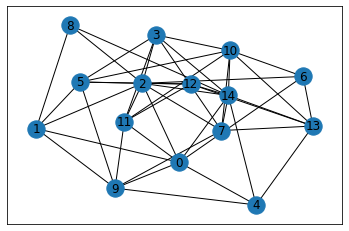

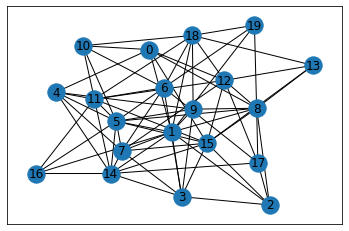

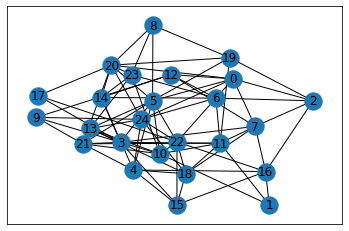

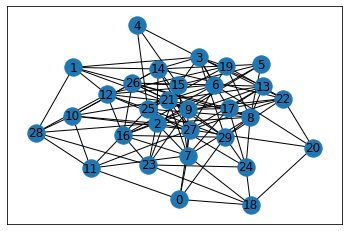

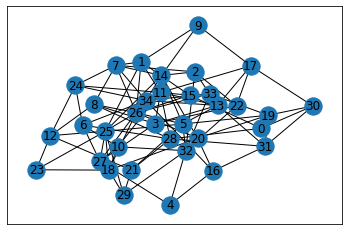

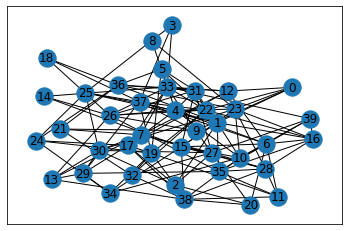

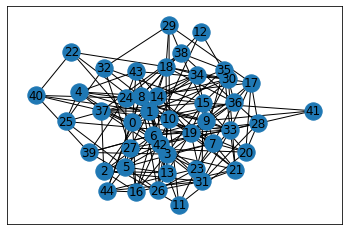

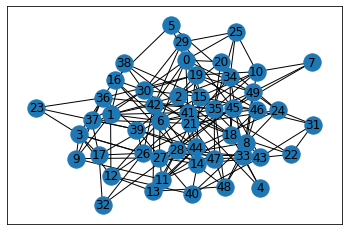

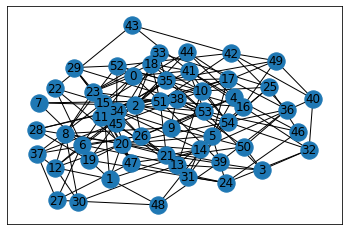

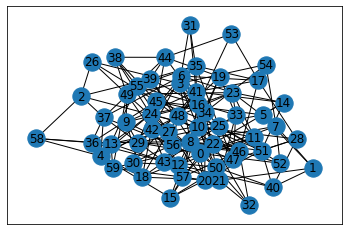

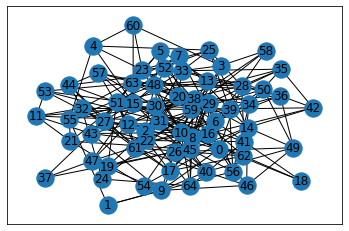

In [30]:
for i in range(11):
   nx.draw_networkx(graph_g[i])
   plt.show()

In [10]:
#gene cost
cost_f

[1532.13327482245,
 3633.387836785565,
 8407.432671514205,
 14069.881329270815,
 22683.951418249926,
 29231.077068666913,
 48947.15779904105,
 64799.59034015525,
 86762.79529154414,
 118385.75294657868,
 145639.9424338956]

In [11]:
 #delete cost
 cost_1

[215.6651209859486,
 417.32449372775005,
 577.3014515067232,
 891.1513322844548,
 1053.6667237928013,
 1493.0667745107883,
 1883.1147207906936,
 2185.1844233812103,
 2719.0243872985293,
 2647.3335836941997,
 4430.661876727498]

In [12]:
time_f

[0.3159017562866211,
 0.3269064426422119,
 0.23063445091247559,
 0.2756774425506592,
 0.34723901748657227,
 0.4751286506652832,
 0.5929217338562012,
 0.7591156959533691,
 0.9207794666290283,
 1.0546860694885254,
 1.5938494205474854]

In [13]:
del_time

[0.03847146034240723,
 0.10382771492004395,
 0.25234365463256836,
 0.49987173080444336,
 0.8122034072875977,
 1.420961856842041,
 2.446169853210449,
 3.2146503925323486,
 4.7395641803741455,
 6.674390554428101,
 11.980476379394531]

In [3]:
plot_list=[]
for i in range(15,66,5):
  plot_list.append(i)

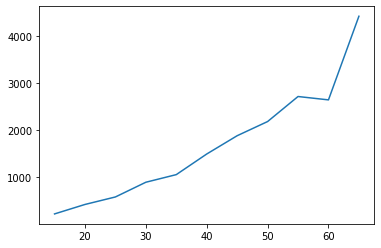

In [6]:
plt.plot( plot_list,cost_1, label = "deletion cost")
plt.show()

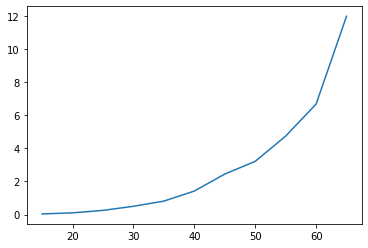

In [9]:
plt.plot( plot_list,del_time, label = "deletion cost")
plt.show()

In [ ]:
plt.plot( plot_list,cost_f, label = "generatic cost")
plt.plot( plot_list,cost_1, label = "deletion cost")
plt.legend()
plt.show()

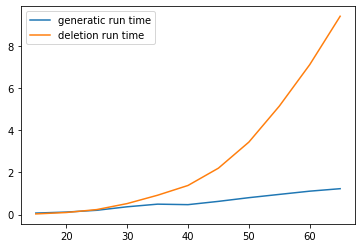

In [40]:
plt.plot( plot_list,time_f, label = "generatic run time")
plt.plot( plot_list,del_time, label = "deletion run time")
plt.legend()
plt.show()